### Generate fake corpous and set its M, the upper bound of $link$.

In [16]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
import zipfgen
%matplotlib inline

In [17]:
def read_file_generate_fake_constraint(constraint = 5, char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    CONSTRAINT = constraint
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    zipf_gen =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA)
    f =  open("roc2.txt","r",encoding='utf8')

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    ##########produce fake words###########
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            if e not in tmp_list:
                tmp_list.append(e)
    char_count_dic = {}
    for c in tmp_list:
        char_count_dic[c] = 0
    
    print("Number of different char in char list: ",len(tmp_list))
            
    list_2 = []
    tmp = ''
    for i in range(SAMPLE_WORD_NUM):
        for j in range(char_num):
            try:
                c = random.choice(tmp_list)
            except IndexError:
                print("OOps! Coumputer is running out of words! Please try other parameters!")
                print("哎呀，電腦詞窮了！試試其他參數吧！")
                print("# of words in the current corpus: ",len(set(list_2)))
                print("# of chars in the current chr list: ",str(len(tmp_list))+"/3939")
            char_count_dic[c] += 1
            if char_count_dic[c] >= CONSTRAINT:
                tmp_list.remove(c)
            tmp = tmp + c
        list_2.append(tmp)
        tmp = ''
    #print(char_count_dic)
    world_list = list_2[:]

    print("Words in corpus: " ,len(world_list))
    #######################################
    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list = world_list[:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        num = zipf_gen.next()
        w = small_world_list[num]
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w',encoding='utf8')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created!")
    print("--------------------")
    return None

## Change your parameters
* constraint: affect upper bound of $Link$
* char_num: char-gram. It decide the number of characters in single word. (假文本裡面每個單詞的字數)
* out_file: name of your out-put fake corpus. (輸出的假文本的檔名)
* sample_word_num: parameter of Gaussian
* num_word_in_fake_scrip: number of word in fake corpus
* alpha: parameter of Gaussian
* noun: True/False, if you only chose nouns in roc.txt (Sinica corpus) to generate fake corpus.

In [18]:
filename = "FAKE2.txt" #change filename when you want to get statictical information of another

read_file_generate_fake_constraint(constraint = 15, char_num = 2, out_file =  filename, 
                            sample_word_num = 6000,
                            num_word_in_fake_scrip = 35000, 
                            alpha = 1.00001, noun = False)

Number of different char in char list:  3939
Words in corpus:  6000
A corpus is successfully loaded.
A fake script is successfully created!
--------------------


read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


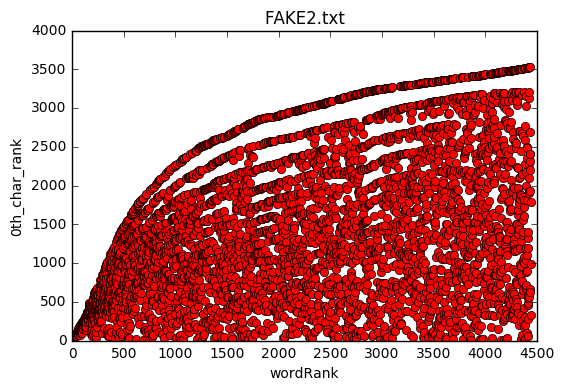

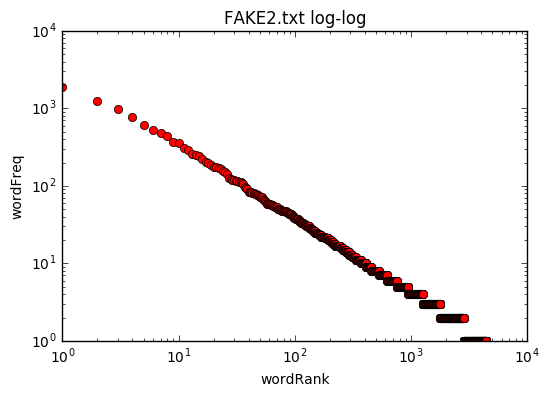

In [19]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
big, char, word = main(filename, encode)
draw(big,title = filename)